# 4: Final

In this notebook, we combine all the information we have learned so far to create our final agent configuration.
To freshen up your memory, these are the things we have improved with respect to `1_bruteforce.ipynb`:

  - We added 10k random warmup steps to populate the agent's memory with non-biased experiences to avoid early local minima.
  - We changed our annealing scheme:
    - We still start at 1.0, but we decrease it to 0.1 instead of 0.01.
    - We use a linear, instead of exponential, decay.
    - Instead of annealing over 80% of the total episodes, we anneal over 50%.
  - We found that with these additions, agents using both _experience replay_ and a _target network_ performed better than those with either one or none of them.
  - We also found that $\varepsilon$-greedy turned out to outperform Boltzmann when using the same annealing schedule.

In order to best compare the results, we give the agents the same budget as we did in `1_bruteforce.ipynb`; 50k episodes.

## Preliminaries

In [34]:
import os

from dql.utils.namespaces import P
from dql.utils.datamanager import ConcatDataManager
from dql.utils.plotter import ColorPlot, LossPlot

import numpy as np
import matplotlib.pyplot as plt

Check if we have the data.

Should be only FIN-TR.

In [39]:
expID = 'FIN'
runIDs = [f for f in os.listdir(P.data) if f.startswith(expID)]
print('\n'.join(runIDs))
runID = runIDs[0]

FIN-TR


Check if the parameters are correct.
We check for the run using the `TR` config, since it will contain all the hyperparameters.

In [41]:
ConcatDataManager(f'{runID}').printSummary()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jdhamelink/Uni/RL/DQL/data/FIN/summary.json'

## Plotting

---
### Target Network + Experience Replay

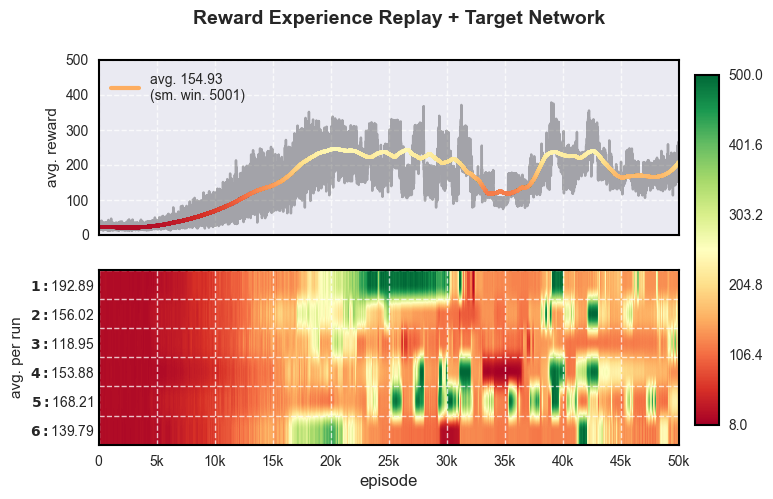

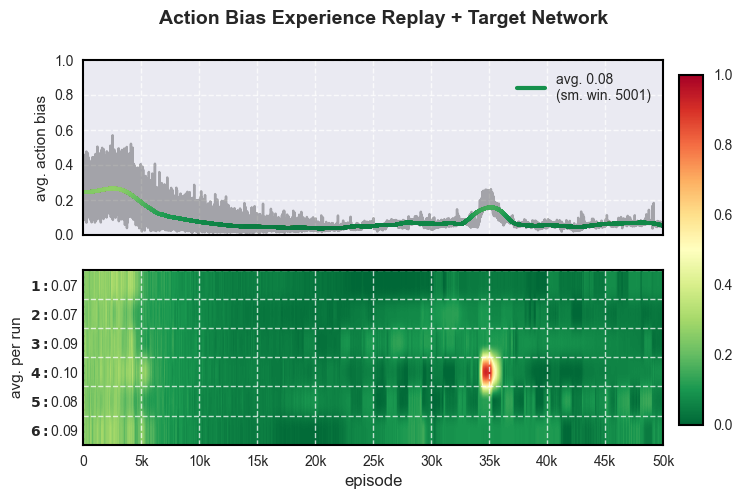

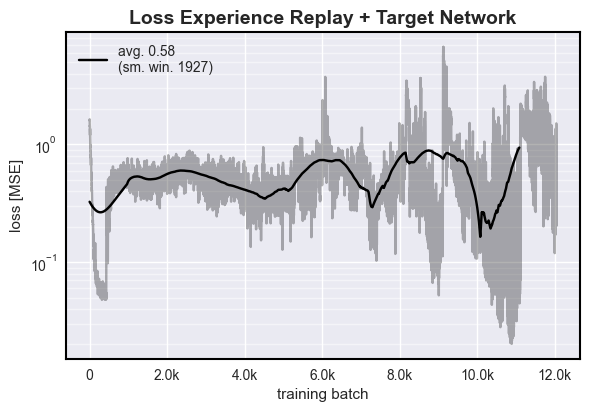

In [40]:
title = f'Experience Replay + Target Network'
DM = ConcatDataManager(f'{runID}')

R = DM.loadRewards()
fR = ColorPlot(R, label='reward', title=title).getFig()

A = DM.loadActions()
AB = np.abs((A / np.sum(A, axis=2, keepdims=True))[:, :, 0] - .5) * 2
fAB = ColorPlot(AB, label='action bias', title=title).getFig()

L = DM.loadLosses()
fL = LossPlot(L, title=title).getFig()